In [17]:
import math
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline
sns.set_style('white')

In [18]:
data = pd.read_json('/Users/lacivert/mr1.json')

In [19]:
#assign DataFrame
df = pd.DataFrame(data)

In [20]:
#list column names
list(df.columns.values)

['Murder', 'Population', 'Population2', 'PropertyCrime', 'Robbery']

In [21]:
display(data.head())

,Murder,Population,Population2,PropertyCrime,Robbery
0,0,1861,3463321,12,0
1,0,2577,6640929,24,0
2,0,2846,8099716,16,0
3,8,97956,9595377936,4090,227
4,0,6388,40806544,223,4


In [22]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['PropertyCrime'].values.reshape(-1, 1)
X = data[['Murder','Population','Population2','Robbery']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.17559527e+02  1.59234099e-02 -1.01045767e-09  2.09186042e+00]]

Intercept: 
 [24.14358781]

R-squared:
0.9987417422426106


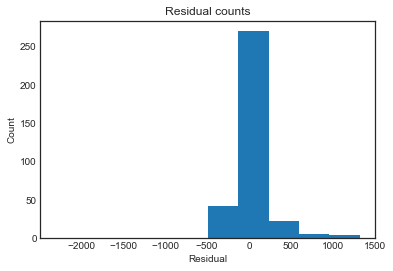

In [25]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

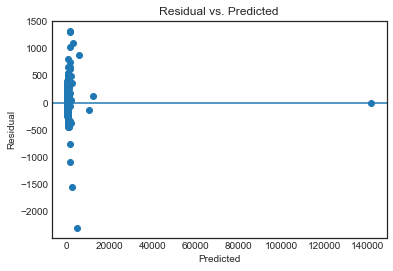

In [26]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [27]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Population,Population2,Robbery
Murder,1.000000,0.986758,0.979574,0.993104
Population,0.986758,1.000000,0.998264,0.998469
Population2,0.979574,0.998264,1.000000,0.995876
Robbery,0.993104,0.998469,0.995876,1.000000


In [28]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PropertyCrime ~ Population+Population2+Murder+Robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [30]:
#Let's look at the coefficients of our model.
lm.params

Intercept      2.414359e+01
Population     1.592341e-02
Population2   -1.010458e-09
Murder         1.175595e+02
Robbery        2.091860e+00
dtype: float64

In [35]:
#And at the p-values as a significance test for each of the coefficients.
lm.pvalues

Intercept      1.960648e-01
Population     5.400167e-46
Population2    5.116465e-21
Murder         6.870379e-14
Robbery        1.821382e-03
dtype: float64

In [36]:
# r squared . . . close to 1 is ideal, but could also be overfitting
lm.rsquared

0.9987417422426107

In [37]:
#confidence interval 
#Column '0' is the lower bound of the 95% confidence interval and 
#column '1' is the upper bound. A confidence interval that contains 0 
#is a sign that the parameter is not explaining significant variance in 
#the outcome. The wider the confidence intervals are, the more uncertainty there is about the model estimates.
lm.conf_int()

,0,1
Intercept,-1.251639e+01,6.080357e+01
Population,1.404110e-02,1.780572e-02
Population2,-1.208108e-09,-8.128071e-10
Murder,8.796575e+01,1.471533e+02
Robbery,7.825352e-01,3.401186e+00
